# NORTHWIND DATABASE

El **objetivo** de este ejercicio es generar una serie de consultas SQL que permitan extraer información relevante de la base de datos y luego exportar los resultados para construir dashboards o visualizaciones que proporcionen insights valiosos para la toma de decisiones empresariales.

La base de datos Northwind es una base de datos de ejemplo clásica que simula las operaciones de una empresa minorista. Contiene tablas relacionales que representan diferentes aspectos del negocio, como productos, clientes, pedidos y empleados. Utilizando consultas SQL, podrás explorar y analizar estos datos para comprender mejor el desempeño del negocio en diferentes áreas.

Una vez que hayas realizado las consultas SQL y obtenido los resultados, podrás utilizarlos para herramientas de visualización de datos como Tableau, Power BI, Streamlit o cualquier otra herramienta de tu elección. 

![img](./img/northwind-er-diagram.png)

Tendrás que elegir uno de los retos a resolver:

### **1. Análisis de Ventas por Región**
Analiza las ventas de productos por región. El objetivo es identificar las regiones que generan más ingresos y las tendencias de ventas a lo largo del tiempo en esas regiones. 
Pista: Utiliza gráficos de barras y líneas para mostrar la evolución de las ventas, así como mapas geográficos para visualizar la distribución de ingresos por región.

In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('./data/northwind.db')


In [5]:
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)
print(tables)


                    name
0             Categories
1        sqlite_sequence
2   CustomerCustomerDemo
3   CustomerDemographics
4              Customers
5              Employees
6    EmployeeTerritories
7          Order Details
8                 Orders
9               Products
10               Regions
11              Shippers
12             Suppliers
13           Territories


In [6]:
def get_table_schema(table_name):
    schema_query = f"PRAGMA table_info({table_name});"
    schema = pd.read_sql_query(schema_query, conn)
    return schema

orders_schema = get_table_schema('Orders')
print(orders_schema)



    cid            name      type  notnull dflt_value  pk
0     0         OrderID   INTEGER        1       None   1
1     1      CustomerID      TEXT        0       None   0
2     2      EmployeeID   INTEGER        0       None   0
3     3       OrderDate  DATETIME        0       None   0
4     4    RequiredDate  DATETIME        0       None   0
5     5     ShippedDate  DATETIME        0       None   0
6     6         ShipVia   INTEGER        0       None   0
7     7         Freight   NUMERIC        0          0   0
8     8        ShipName      TEXT        0       None   0
9     9     ShipAddress      TEXT        0       None   0
10   10        ShipCity      TEXT        0       None   0
11   11      ShipRegion      TEXT        0       None   0
12   12  ShipPostalCode      TEXT        0       None   0
13   13     ShipCountry      TEXT        0       None   0


In [7]:
def get_table_content(table_name):
    content_query = f"SELECT * FROM {table_name};"
    content_table = pd.read_sql_query(content_query, conn)
    return content_table

for table in tables['name']:
    print(f"\nContenido de la tabla '{table}':")
    content_db = get_table_content(table)
    print(content_db)



Contenido de la tabla 'Categories':
   CategoryID    CategoryName  \
0           1       Beverages   
1           2      Condiments   
2           3     Confections   
3           4  Dairy Products   
4           5  Grains/Cereals   
5           6    Meat/Poultry   
6           7         Produce   
7           8         Seafood   

                                         Description  \
0        Soft drinks, coffees, teas, beers, and ales   
1  Sweet and savory sauces, relishes, spreads, an...   
2                Desserts, candies, and sweet breads   
3                                            Cheeses   
4                Breads, crackers, pasta, and cereal   
5                                     Prepared meats   
6                          Dried fruit and bean curd   
7                                   Seaweed and fish   

                                             Picture  
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...  
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00.

DatabaseError: Execution failed on sql 'SELECT * FROM Order Details;': near "Order": syntax error

In [8]:
def get_table_preview(table_name, limit=5):
    preview_query = f"SELECT * FROM {table_name} LIMIT {limit};"
    preview = pd.read_sql_query(preview_query, conn)
    return preview

orders_preview = get_table_preview('Orders')
print(orders_preview)

   OrderID CustomerID  EmployeeID   OrderDate RequiredDate ShippedDate  \
0    10248      VINET           5  2016-07-04   2016-08-01  2016-07-16   
1    10249      TOMSP           6  2016-07-05   2016-08-16  2016-07-10   
2    10250      HANAR           4  2016-07-08   2016-08-05  2016-07-12   
3    10251      VICTE           3  2016-07-08   2016-08-05  2016-07-15   
4    10252      SUPRD           4  2016-07-09   2016-08-06  2016-07-11   

   ShipVia  Freight                   ShipName           ShipAddress  \
0        3    16.75  Vins et alcools Chevalier    59 rue de l-Abbaye   
1        1    22.25         Toms Spezialitäten         Luisenstr. 48   
2        2    25.00              Hanari Carnes       Rua do Paço, 67   
3        1    20.25       Victuailles en stock    2, rue du Commerce   
4        2    36.25           Suprêmes délices  Boulevard Tirou, 255   

         ShipCity      ShipRegion ShipPostalCode ShipCountry  
0           Reims  Western Europe          51100      Franc

In [9]:
query = '''
SELECT region
FROM customers
'''


In [10]:
df = pd.read_sql_query(query, conn)

df

,Region
0,Western Europe
1,Central America
2,Central America
3,British Isles
4,Northern Europe
...,...
88,Scandinavia
89,South America
90,North America
91,Scandinavia


### **2. Análisis de Desempeño de Productos**
Analiza el desempeño de los productos de la empresa. Examina las ventas de productos por categoría, identificando los productos más vendidos y los menos vendidos. 

Pista: Utiliza gráficos de barras y de tarta para visualizar la participación de mercado de cada categoría y los ingresos generados por los productos individuales.

In [2]:
!pip install "ibis-framework[sqlite]"

  Using cached ibis_framework-9.0.0-py3-none-any.whl.metadata (15 kB)
Using cached ibis_framework-9.0.0-py3-none-any.whl (1.8 MB)


ERROR: Could not install packages due to an OSError: [WinError 206] El nombre del archivo o la extensión es demasiado largo: 'C:\\Users\\Usuario\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\ibis\\backends\\bigquery\\tests\\unit\\snapshots\\test_compiler\\test_literal_string\\not_escape_special_characters'



### **3. Análisis de Rentabilidad de Clientes**
Analiza la rentabilidad de los clientes de la empresa. Examina los ingresos generados por cada cliente, así como los costos asociados con el servicio o producto proporcionado. 

Pista: Utiliza gráficos de dispersión y tablas dinámicas para identificar los clientes más rentables y aquellos que requieren mayor atención.

### **4. Análisis de Inventarios y Proveedores**
Analiza los niveles de inventario y la gestión de proveedores de la empresa. Examina el inventario disponible por categoría de productos, así como el rendimiento de los proveedores en términos de puntualidad de entrega y calidad de los productos. 

Pista: Utiliza gráficos de líneas y tablas dinámicas para mostrar tendencias y comparar el desempeño de los proveedores.


### **5. Análisis de Comportamiento de Empleados**
Analiza el comportamiento de los empleados de la empresa. Examina las ventas realizadas por cada empleado, así como su eficiencia en el manejo de pedidos y su puntualidad en la entrega de productos. 

Pista: Utiliza gráficos de barra y de dispersión para comparar el desempeño de los empleados y identificar áreas de mejora.

In [12]:
query = '''
SELECT 
    e.EmployeeID,
    e.LastName || ', ' || e.FirstName AS EmployeeName,
    SUM(od.Quantity * od.UnitPrice * (1 - od.Discount)) AS TotalSales
FROM 
    Employees e
JOIN 
    Orders o ON e.EmployeeID = o.EmployeeID
JOIN 
    [Order Details] od ON o.OrderID = od.OrderID
GROUP BY 
    e.EmployeeID
ORDER BY 
    TotalSales DESC;
'''
df = pd.read_sql_query(query, conn)

df

,EmployeeID,EmployeeName,TotalSales
0,4,"Peacock, Margaret",5.148840e+07
1,5,"Buchanan, Steven",5.138646e+07
2,3,"Leverling, Janet",5.044557e+07
3,1,"Davolio, Nancy",4.965942e+07
4,7,"King, Robert",4.965190e+07
5,8,"Callahan, Laura",4.928114e+07
6,6,"Suyama, Michael",4.913997e+07
7,9,"Dodsworth, Anne",4.901968e+07
8,2,"Fuller, Andrew",4.831410e+07


C:\Users\Usuario\AppData\Local\Temp\ipykernel_26972\895544930.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_df, x='TotalSales', y='EmployeeName', palette='viridis')


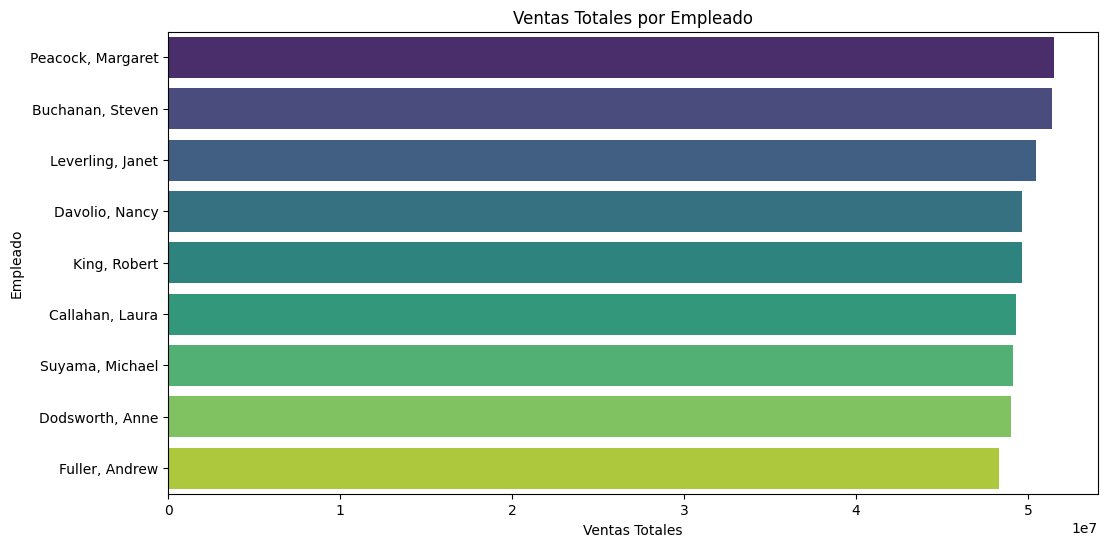

C:\Users\Usuario\AppData\Local\Temp\ipykernel_26972\895544930.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_df, x='NumberOfOrders', y='EmployeeName', palette='viridis')


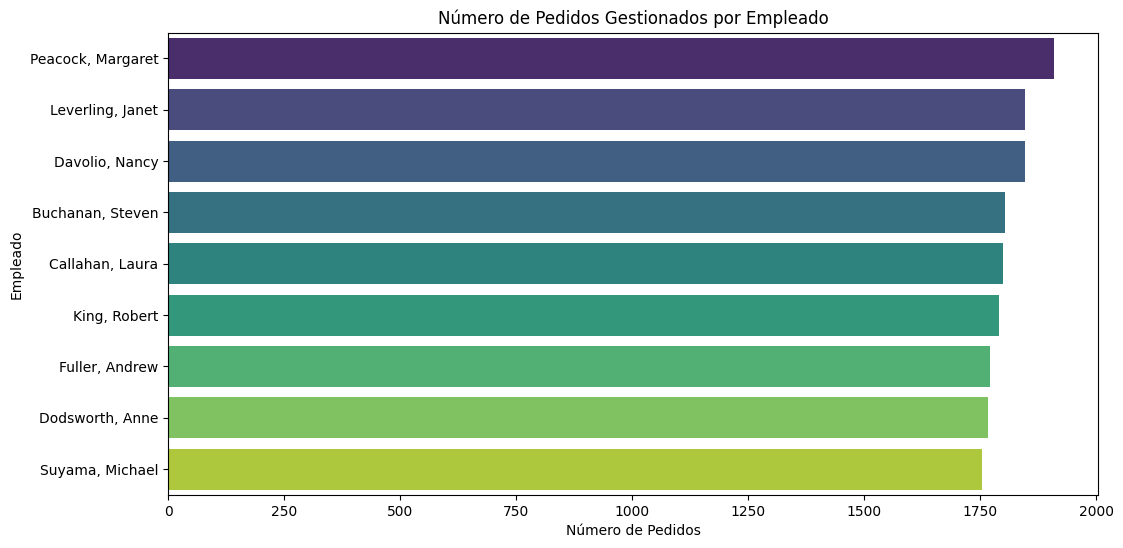

C:\Users\Usuario\AppData\Local\Temp\ipykernel_26972\895544930.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=punctuality_df, x='AvgDaysEarly', y='EmployeeName', palette='viridis')


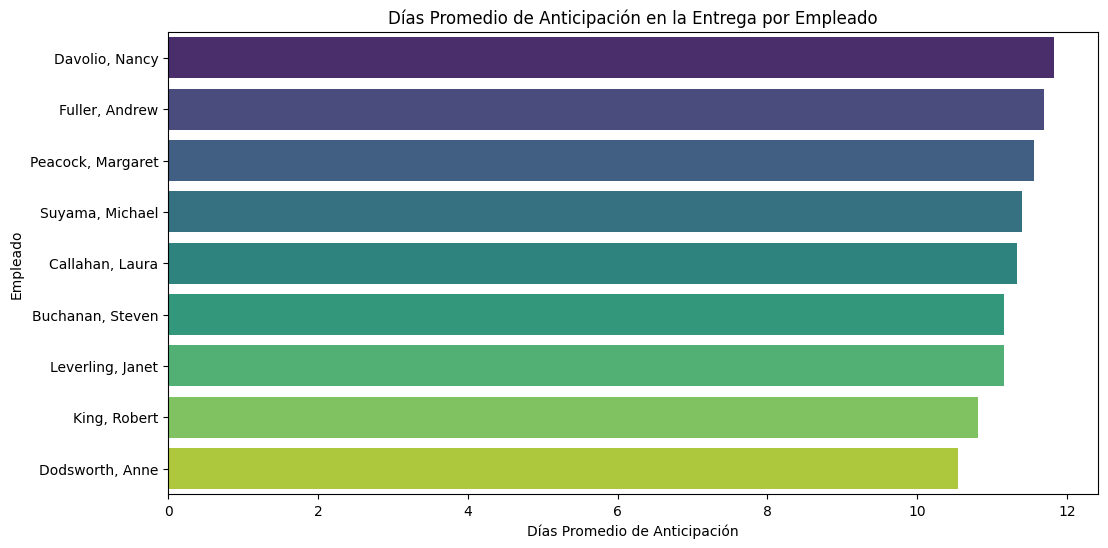

: 

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
# conn = sqlite3.connect('northwind.db')
conn = sqlite3.connect('./data/northwind.db')

# Consultas SQL
sales_query = """
SELECT 
    e.EmployeeID,
    e.LastName || ', ' || e.FirstName AS EmployeeName,
    SUM(od.Quantity * od.UnitPrice * (1 - od.Discount)) AS TotalSales
FROM 
    Employees e
JOIN 
    Orders o ON e.EmployeeID = o.EmployeeID
JOIN 
    [Order Details] od ON o.OrderID = od.OrderID
GROUP BY 
    e.EmployeeID
ORDER BY 
    TotalSales DESC;
"""

orders_query = """
SELECT 
    e.EmployeeID,
    e.LastName || ', ' || e.FirstName AS EmployeeName,
    COUNT(o.OrderID) AS NumberOfOrders
FROM 
    Employees e
JOIN 
    Orders o ON e.EmployeeID = o.EmployeeID
GROUP BY 
    e.EmployeeID
ORDER BY 
    NumberOfOrders DESC;
"""

punctuality_query = """
SELECT 
    e.EmployeeID,
    e.LastName || ', ' || e.FirstName AS EmployeeName,
    AVG(JULIANDAY(o.RequiredDate) - JULIANDAY(o.ShippedDate)) AS AvgDaysEarly
FROM 
    Employees e
JOIN 
    Orders o ON e.EmployeeID = o.EmployeeID
WHERE 
    o.ShippedDate IS NOT NULL AND o.RequiredDate IS NOT NULL
GROUP BY 
    e.EmployeeID
ORDER BY 
    AvgDaysEarly DESC;
"""

# Ejecutar consultas y cargar resultados en dataframes
sales_df = pd.read_sql_query(sales_query, conn)
orders_df = pd.read_sql_query(orders_query, conn)
punctuality_df = pd.read_sql_query(punctuality_query, conn)

# Cerrar la conexión
conn.close()

# Graficar Ventas por Empleado
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_df, x='TotalSales', y='EmployeeName', palette='viridis')
plt.title('Ventas Totales por Empleado')
plt.xlabel('Ventas Totales')
plt.ylabel('Empleado')
plt.show()

# Graficar Eficiencia en el Manejo de Pedidos
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_df, x='NumberOfOrders', y='EmployeeName', palette='viridis')
plt.title('Número de Pedidos Gestionados por Empleado')
plt.xlabel('Número de Pedidos')
plt.ylabel('Empleado')
plt.show()

# Graficar Puntualidad en la Entrega
plt.figure(figsize=(12, 6))
sns.barplot(data=punctuality_df, x='AvgDaysEarly', y='EmployeeName', palette='viridis')
plt.title('Días Promedio de Anticipación en la Entrega por Empleado')
plt.xlabel('Días Promedio de Anticipación')
plt.ylabel('Empleado')
plt.show()
